In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Hyperparameters
# Batch training because computing gradients over the entire dataset is computationally expensive
# as we compute average gradient over all samples
batch_size = 64
learning_rate = 0.001
epochs = 10

In [2]:
if torch.backends.mps.is_available():
    device = torch.device('mps')  # Use MPS for Apple Silicon
elif torch.cuda.is_available():
    device = torch.device('cuda')  # Use CUDA for NVIDIA GPUs
else:
    device = torch.device('cpu')  # Fallback to CPU

print(f"Using device: {device}")

Using device: mps


In [4]:
# Data transformations
transform = transforms.Compose([
    # converts images to PyTorch tensors and scales pixel values to [0, 1].
    transforms.ToTensor(),
    # normalise using mean = 0.5 and st_dev = 0.5 with z-score formula (x - mean) / st_dev
    # basically, x_normalised = 2x - 1 and remember all x's from ToTensor() are [0, 1]
    # so we normalise all pixel values from [-1, 1].

    # We do this because many activation functions (like tanh or ReLU) and optimization 
    # algorithms perform better when the input data is normalized and has a mean close to 0.
    transforms.Normalize((0.5,), (0.5,))
])

In [5]:
# Load Fashion MNIST dataset
train_dataset = datasets.FashionMNIST(
    root='./data', train=True, transform=transform, download=True
)
test_dataset = datasets.FashionMNIST(
    root='./data', train=False, transform=transform, download=True
)

100.0%


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [10]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [19]:
# Data Analysis
train_dataset
# num datapoints in 60000

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [27]:
# Tuple of Data and Target
train_dataset[0]

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

In [31]:
# Data
train_dataset[0][0]

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

In [29]:
# Class
train_dataset[0][1]

9

In [33]:
# Data Shape
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [35]:
# Extract labels
labels = train_dataset.targets

# Find the unique classes
num_classes = len(torch.unique(labels))
num_classes

10

In [36]:
# From Data Analysis we have 60,000 28x28 images in the training set, this allows us to make our neural network
# Make the Neural Network
class FashionMNISTClassifier(nn.Module):
    def __init__(self):
        super(FashionMNISTClassifier, self).__init__()
        # Define layers explicitly
        # From Tensor of Shape (28, 28) to (28 * 28,)
        self.flatten = nn.Flatten()
        # To lower dimensional representation
        self.fc1 = nn.Linear(28 * 28, 256)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        # We have 10 clases in the dataset
        self.fc3 = nn.Linear(128, 10)
    
    def forward(self, x):
        # Define the forward pass
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x


In [58]:
class FashionMNISTCNN(nn.Module):
    def __init__(self):
        super(FashionMNISTCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # Reduces 28x28 -> 14x14
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # Reduces 14x14 -> 7x7
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)  # 10 classes for FashionMNIST

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

In [37]:
# Instantiate the model, loss function, and optimizer - what actually updates weights
model = FashionMNISTClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [38]:
# Training loop
def train(model, loader, criterion, optimizer):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for imgs, targets in loader:
            imgs, targets = imgs.to(device), targets.to(device)

            # Forward pass
            outputs = model(imgs)
            loss = criterion(outputs, targets)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
        
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(loader):.4f}")


In [39]:
# Evaluation function
def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Accuracy: {accuracy:.2f}%")

In [40]:
# Train and evaluate the model
train(model, train_loader, criterion, optimizer)
evaluate(model, test_loader)

Epoch [1/10], Loss: 0.4937
Epoch [2/10], Loss: 0.3679
Epoch [3/10], Loss: 0.3280
Epoch [4/10], Loss: 0.3050
Epoch [5/10], Loss: 0.2851
Epoch [6/10], Loss: 0.2676
Epoch [7/10], Loss: 0.2539
Epoch [8/10], Loss: 0.2435
Epoch [9/10], Loss: 0.2313
Epoch [10/10], Loss: 0.2198
Accuracy: 87.43%


In [44]:
prediction = model(test_dataset[0][0].to(device))
prediction

tensor([[-13.9600, -12.3344, -16.6090, -12.6213, -15.9972,  -0.1711, -14.2693,
           1.5492, -12.8284,   6.5383]], device='mps:0',
       grad_fn=<LinearBackward0>)

In [47]:
torch.argmax(prediction).item()

9

In [45]:
test_dataset[0][1]

9

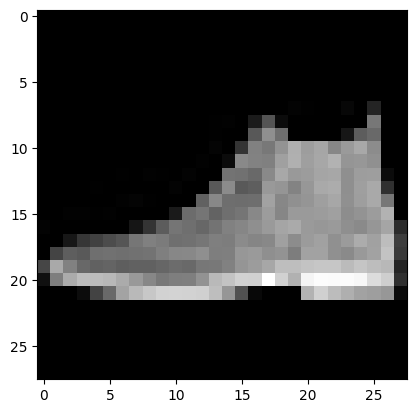

In [56]:
# Visualise Image Data
plt.imshow(test_dataset[0][0].squeeze(), cmap="gray")
plt.show()

In [59]:
# Label of Image
label = test_dataset[0][1]
train_dataset.classes[label]

'Ankle boot'

In [60]:
model_cnn = FashionMNISTCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [61]:
# Train and evaluate the model
train(model, train_loader, criterion, optimizer)
evaluate(model, test_loader)

Epoch [1/10], Loss: 0.2107
Epoch [2/10], Loss: 0.2015
Epoch [3/10], Loss: 0.1887
Epoch [4/10], Loss: 0.1839
Epoch [5/10], Loss: 0.1775
Epoch [6/10], Loss: 0.1655
Epoch [7/10], Loss: 0.1618
Epoch [8/10], Loss: 0.1538
Epoch [9/10], Loss: 0.1479
Epoch [10/10], Loss: 0.1435
Accuracy: 89.09%


In [69]:
# Preprocess the image
image = test_dataset[0][0]  # Get the first image from the test dataset
image = image.unsqueeze(0).to(device)  # Add batch dimension and move to device

prediction_logits = model_cnn(image)  # Forward pass
prediction_logits

tensor([[ 0.0333,  0.0293,  0.0799, -0.1019, -0.0356,  0.0229,  0.0596,  0.0352,
         -0.0360,  0.0054]], device='mps:0', grad_fn=<LinearBackward0>)

In [70]:
predicted_class = torch.argmax(prediction_logits).item()  # Get predicted class

# Output the predicted class
print(f"Predicted Class: {predicted_class}")

Predicted Class: 2


In [71]:
train_dataset.classes[predicted_class]

'Pullover'

In [72]:
# Observe CNN classifier is very wrong